# Python Homework 1

<b> Instructions:</b> This Python Homework is due on <b> Thursday, January 21st, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via Gradescope!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* poissonRV(seed, mean,n) that returns for given seed a bunch of n Poisson distributed random numbers with the provided mean. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=\mathbb{P}(\{5\})=1/10$ and $\mathbb{P}(\{6\})=1/2$.

In [84]:
import numpy as np
import math
import matplotlib.pyplot as plt

Here should come your code for the three functions:

In [85]:
def exponentialRV(seed, mean,n):
    
    randomProbExp=[]
    exponentialSample=[] #Empty lists, will be populated
    
    np.random.seed(seed) #Generate using random num
    
    randomProbExp=np.random.random_sample(n) #Probabilities used for inv func
    
    populateValuesExp=0 #Default value, will be changed
    
    for k in range(n): #Populates exponentialSample
        populateValuesExp= ((np.log(1-randomProbExp[k]))*(-mean))
        exponentialSample.append(populateValuesExp)
    
    return exponentialSample

In [86]:
def poissonRV(seed, mean, n):
    
    np.random.seed(seed)
    randomProbPoiss = np.random.random_sample(n)
    poissonSample=[] 
        
    for k in range(n):
        mutableValue=0 #Placeholder value that will increase over time
        probPoiss=0
        while probPoiss < randomProbPoiss[k]: #populates poissonSample
            probPoiss = probPoiss+(math.e**(-mean)*((mean**mutableValue)/(math.factorial(mutableValue))))
            if probPoiss<randomProbPoiss[k]:
                mutableValue=mutableValue+1
            else:
                poissonSample.append(mutableValue)
    
    return poissonSample

In [87]:
def funnyDiceRV(seed, n):
      
    np.random.seed(seed) #Generate using random num
    
    randomProbDice=np.random.random_sample(n) #Probability used in function
    funnyDiceSample=[]
    
    for k in range(n): #Various statements to account for CDF
        if randomProbDice[k]<(1/10) and randomProbDice[k]>=(0/10):
            funnyDiceSample.append(1)
        if randomProbDice[k]>=(1/10) and randomProbDice[k]<(2/10):
            funnyDiceSample.append(2)
        if randomProbDice[k]>=(2/10) and randomProbDice[k]<(3/10):
            funnyDiceSample.append(3)
        if randomProbDice[k]>=(3/10) and randomProbDice[k]<(4/10):
            funnyDiceSample.append(4)
        if randomProbDice[k]>=(4/10) and randomProbDice[k]<(5/10):
            funnyDiceSample.append(5)
        if randomProbDice[k]>=(5/10) and randomProbDice[k]<(10/10):
            funnyDiceSample.append(6)
    
    return funnyDiceSample

In [88]:
print(exponentialRV(105, 3,5))# You should test all three functions 
print(poissonRV(105, 2.5,5))
print(funnyDiceRV(105, 5))

[0.2623650861900565, 1.2171737414601362, 5.884564774747791, 0.3350978072529029, 2.301285780939671]
[1, 2, 4, 1, 2]
[1, 4, 6, 2, 6]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

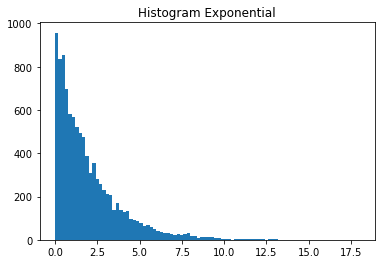

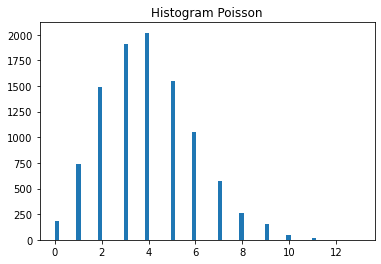

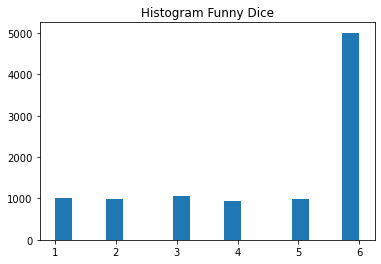

In [89]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2,numberSimulations)
poissonSamples=poissonRV(1, 4,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

#np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(poissonSamples, bins='auto')
plt.title("Histogram Poisson")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. Is the result of your calculation in line with what you expect? Why?

In [90]:
samples=exponentialRV(1,2,10000)
empiricalMean=0
for mutVal in samples:
    empiricalMean=empiricalMean+mutVal
empiricalMean=((1/10000)*(empiricalMean))

empiricalVar=0
for mutVal in samples:
    empiricalVar=empiricalVar+(mutVal-empiricalMean)**2 
empiricalVar=((1/10000)*(empiricalVar))

print(empiricalMean)
print(empiricalVar)

1.9770938809848242
3.84858102932464


In [91]:
# Yes, the results are as expected. The value for the mean is approaching 2, whereas
# the variance is approaching 4, and will continue to do so if we were to increase
# the number of simulations